<p style='text-align: right;'><i>Aug 12 - 25, 2024 </i> </p>

<h1 style="background-color:orange;"></h1>


<h1 style='text-align: center;'> Voyager Team Datathon 2024 </h1>


<h3 style='text-align: center;'> <i> Machine Learning Phase at Datathon 2024 </i> </h3>

<h5 style='text-align: center;'> <i>Our data journey</i> </h5>

<h1 style="background-color:orange;"></h1>

<div style="background-color:LightGray;"><p style='text-align: center;'><align = center>Participants: <i>Oscar Sierra, David Mercado, Rodrigo Quezada </i></p></div>  

***

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 

In [2]:
# Surpressing warnings:

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Now export the sample file for ML processing

ml_eds = pd.read_csv('c:/Users/dslab/Desktop/Datathon_2024/ml_eds_8_25_2024.csv')

mlds = ml_eds.drop(ml_eds.columns[0], axis=1)

mlds.shape

(52741, 10)

In [4]:
mlds.columns

Index(['Cameo', 'Mentions', 'Tone', 'Index', 'Year', 'Month', 'Day',
       'Day_of_week', 'Day_of_year', 'Country_Num'],
      dtype='object')

In [5]:
mlds

,Cameo,Mentions,Tone,Index,Year,Month,Day,Day_of_week,Day_of_year,Country_Num
0,874,90,-8.421541,-757.938669,2024,8,8,3,221,145
1,874,64,-4.787869,-306.423596,2024,8,8,3,221,208
2,874,36,-0.420969,-15.154893,2023,8,9,2,221,208
3,874,30,-0.500731,-15.021930,2024,8,8,3,221,208
4,874,24,-3.418224,-82.037370,2024,8,8,3,221,39
...,...,...,...,...,...,...,...,...,...,...
52736,190,1,-3.352559,-3.352559,2024,8,8,3,221,98
52737,190,1,-3.352559,-3.352559,2024,8,8,3,221,208
52738,190,1,-7.305936,-7.305936,2024,8,8,3,221,208
52739,190,1,-7.305936,-7.305936,2024,8,8,3,221,208


In [61]:
mlds.columns

Index(['Cameo', 'Mentions', 'Tone', 'Index', 'Year', 'Month', 'Day',
       'Day_of_week', 'Day_of_year', 'Country_Num'],
      dtype='object')

In [6]:
mlds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52741 entries, 0 to 52740
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cameo        52741 non-null  int64  
 1   Mentions     52741 non-null  int64  
 2   Tone         52741 non-null  float64
 3   Index        52741 non-null  float64
 4   Year         52741 non-null  int64  
 5   Month        52741 non-null  int64  
 6   Day          52741 non-null  int64  
 7   Day_of_week  52741 non-null  int64  
 8   Day_of_year  52741 non-null  int64  
 9   Country_Num  52741 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.0 MB


In [8]:
mlds.isnull().sum()

Cameo          0
Mentions       0
Tone           0
Index          0
Year           0
Month          0
Day            0
Day_of_week    0
Day_of_year    0
Country_Num    0
dtype: int64

In [9]:
mlds.columns

Index(['Cameo', 'Mentions', 'Tone', 'Index', 'Year', 'Month', 'Day',
       'Day_of_week', 'Day_of_year', 'Country_Num'],
      dtype='object')

In [21]:
# Display a correlation relationship sort by more relevant among all the variables

corr_matrix = mlds.corr(numeric_only=True)

corr_matrix['Index'].sort_values(ascending=False)

Index          1.000000
Tone           0.162049
Day           -0.000227
Month         -0.001964
Day_of_year   -0.002289
Year          -0.004959
Day_of_week   -0.005393
Cameo         -0.013680
Country_Num   -0.019068
Mentions      -0.810247
Name: Index, dtype: float64

In [22]:
# Compute the eigenvalues of the correlation matrix to dismiss multicollinearity
# as if one or more eigenvalues close to zero beware of it.

eigenvalues = np.linalg.eigvals(corr_matrix)

print("Eigenvalues of the correlation matrix are: ")
for i in eigenvalues:
    print(i)

Eigenvalues of the correlation matrix are: 
2.7772497598109895
1.8377460028998094
1.2588205673396422
1.1259238259094766
1.0080708887251022
0.840889826364644
0.8914705476354752
0.18054400482349034
0.07912577515139171
0.0001588013399784455


In [23]:
mlds.columns

Index(['Cameo', 'Mentions', 'Tone', 'Index', 'Year', 'Month', 'Day',
       'Day_of_week', 'Day_of_year', 'Country_Num'],
      dtype='object')

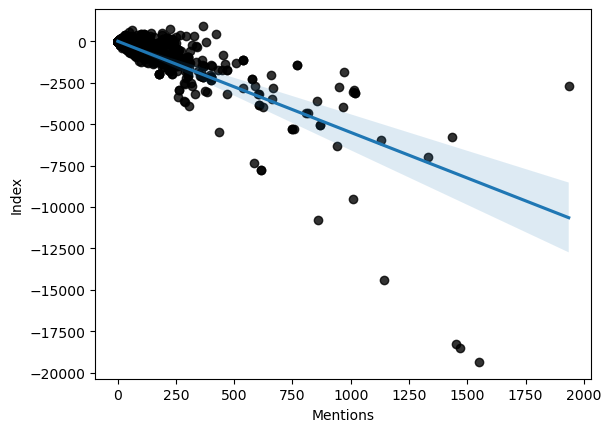

In [26]:
sns.regplot(x=mlds.Mentions, y=mlds.Index, data=mlds, scatter_kws={'color': 'black'}); 

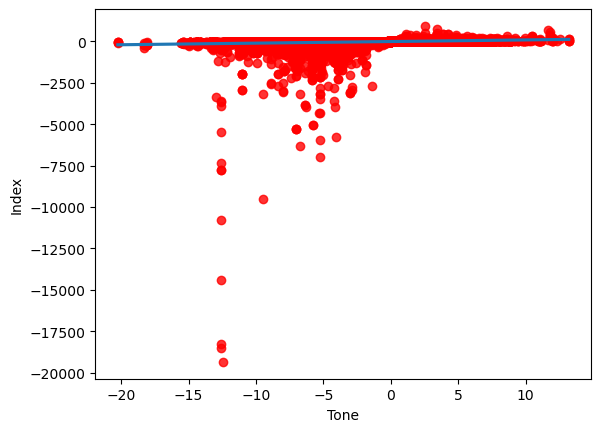

In [25]:
sns.regplot(x=mlds.Tone, y=mlds.Index, data=mlds, scatter_kws={'color': 'red'}); 

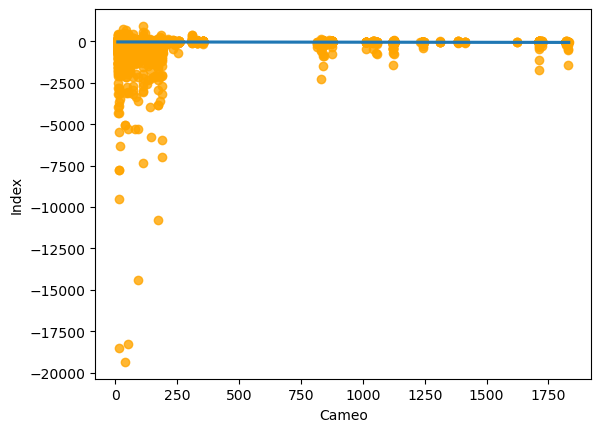

In [27]:
sns.regplot(x=mlds.Cameo, y=mlds.Index, data=mlds, scatter_kws={'color': 'orange'}); 

# Using and Evaluating Machine Learning Models

*Parameter check and tunning directly over the cells per time limintations for the Datathon 2024 contest*

***

## Linear Regression Model (without scaling)


In [40]:
# Split data into independent and dependent variables
   #Independent variables
X = mlds.drop("Index", axis=1)

    # Dependent variable
y = mlds["Index"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

ph = " for ALL independent variables with random state zero"

# Use R squared for Model evaluation

#r2_score(y_test,sleep_score_predictions)
print("Training data R squared: ", lm.score(X_train, y_train))
print("Testing data R squared: ", lm.score(X_test,y_test))

# Proportion of the variation in the dependent variable that is predictable from the independent variables. 
# The closer is R squared to 1.0, the better is the fit of the model.
# If R squared is negative suggests overfitting (that statistical model fits exactly against its training data)
print()
print(f"Mean Squared Error{ph}:", mse)
print(f"R-squared{ph}: ", r_squared)


Training data R squared:  -855.3369680231234
Testing data R squared:  -1997.7603822423448

Mean Squared Error for ALL independent variables with random state zero: 13572.139608549998
R-squared for ALL independent variables with random state zero:  0.487592344655559


## Linear Regression Model (with scaling)

In [41]:
# Split data into independent and dependent variables
   #Independent variables
X = mlds.drop("Index", axis=1)

    # Dependent variable
y = mlds["Index"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create instance to remove the mean and scaling to unit variance (standardize features) 
ss=StandardScaler()
ss

# Transform the training and the testing data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

ph = " for ALL independent variables with random state zero"

# Use R squared for Model evaluation

#r2_score(y_test,sleep_score_predictions)
print("Training data R squared: ", lm.score(X_train, y_train))
print("Testing data R squared: ", lm.score(X_test,y_test))

# Proportion of the variation in the dependent variable that is predictable from the independent variables. 
# The closer is R squared to 1.0, the better is the fit of the model.
# If R squared is negative suggests overfitting (that statistical model fits exactly against its training data)
print()
print(f"Mean Squared Error{ph}:", mse)
print(f"R-squared{ph}: ", r_squared)

Training data R squared:  0.6960968526507227
Testing data R squared:  0.48759234465555923

Mean Squared Error for ALL independent variables with random state zero: 13572.139608549995
R-squared for ALL independent variables with random state zero:  0.48759234465555923


## Random Forest Regressor Model

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into independent and dependent variables
   #Independent variables
X = mlds.drop("Index", axis=1)

    # Dependent variable
y = mlds["Index"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
                                                                                                     
# Initialize the RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
rfr.fit(X_train, y_train)
                                                    
# Make predictions on the test data
y_pred = rfr.predict(X_test)
                                                    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("Mean Squared Error RandomForestRegressor:", mse)
print("R-squared RandomForestRegressor:", r2)


Mean Squared Error RandomForestRegressor: 4284.280303938508
R-squared RandomForestRegressor: 0.8382496725868827


## KNN Model

In [55]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into independent and dependent variables
   #Independent variables
X = mlds.drop("Index", axis=1)

    # Dependent variable
y = mlds["Index"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
                                                    
# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=9)
                                                    
# Fit the model on the training data
knn.fit(X_train, y_train)
                                                    
# Make predictions on the test data
y_pred = knn.predict(X_test)
                                                    
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 10294.907514763054
R-squared: 0.6113221957793297


## Gradient Boosting Regressor Model

In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into independent and dependent variables
   #Independent variables
X = mlds.drop("Index", axis=1)

    # Dependent variable
y = mlds["Index"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
                                                    
# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Use R squared for Model evaluation

print()
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 425.2961216571533
R-squared: 0.9839432105172171


<div class="alert alert-block alert-warning">
<h2> Process Insights</h2>
-------------------------------------------------------------------------------------------------------------------------------

- This model is performing very well. Recommended to now train the model with an expanded dataset.
    
    <h3> Saving the model as we might run out of time for the Datathon 2024 delivery. </h3> 
       
</div>

### Save the Model

In [59]:
import pickle

# Load sample data
#data = load_boston()
#X, y = data.data, data.target

# Train a Gradient Boosting Regressor model
#model = GradientBoostingRegressor()
#model.fit(X, y)

# Save the model to a file
with open('voyager_model.pkl', 'wb') as file:
    pickle.dump(gbr, file)

### Confirm Model Retrieval

In [60]:
# Confirm Model can be retrieved

# Load the model from the file
with open('voyager_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(X)
print(predictions)


[-736.85187795 -253.21283061   -7.77919908 ...  -15.97459983  -15.97459983
   -4.00711821]


<div class="alert alert-block alert-success">
<h2> Process Insights</h2>
-------------------------------------------------------------------------------------------------------------------------------

- Model is now saved at our repo to be used as-is as needed.
- We also have the option to use the code set to train it at a larger dataset.
    
    <h3> Model accuracy is considered within a very high range at 98.39%. </h3> 
       
</div>